### MULTICLASS CLASSIFICATION

In [66]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.style.use('ggplot')
import sklearn
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
import time

### Data 

In [3]:
#load the data
data= pd.read_csv('Data/Wine.csv',header=None)

In [67]:
#shape 
data.shape #(768, 9)

(178, 14)

In [5]:
#data summary
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [6]:
column_names=['Class','Alcohol','Malic_acid','Ash','Alcalinity_of_ash'  ,'Magnesium','Totalphenols','Flavanoid','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280/OD315','Proline']     

In [7]:
data.columns=column_names

In [8]:
#data description
data.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Totalphenols,Flavanoid,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
#data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic_acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_ash       178 non-null float64
Magnesium               178 non-null int64
Totalphenols            178 non-null float64
Flavanoid               178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280/OD315             178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


<h3>Data exploration</h3>

In [13]:
data.corr()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Totalphenols,Flavanoid,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Totalphenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoid,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [27]:
data.head(5)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Totalphenols,Flavanoid,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Data vizualization

Class
1    59
2    71
3    48
dtype: int64


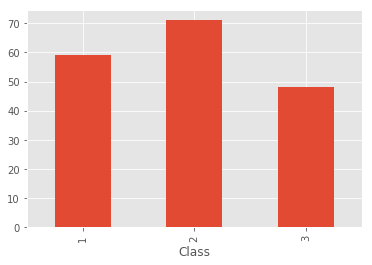

In [11]:
#no. of entries for individual outcome variable 
print(data.groupby('Class').size())
data.groupby('Class').size().plot.bar()

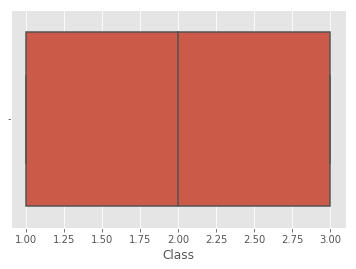

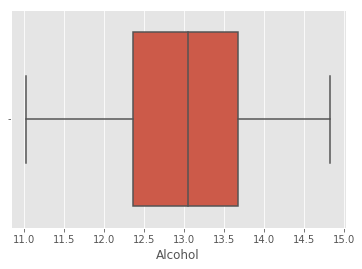

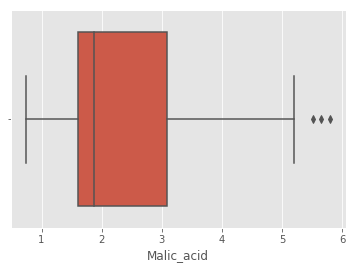

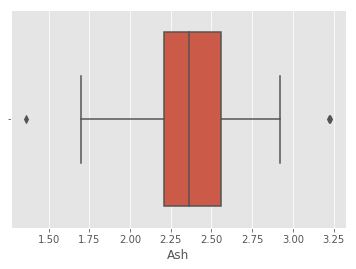

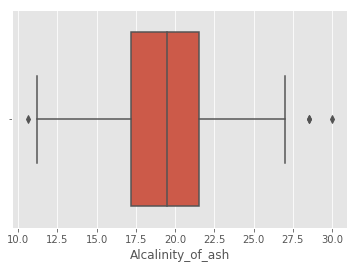

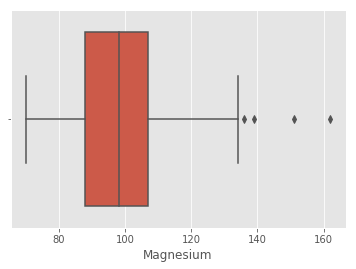

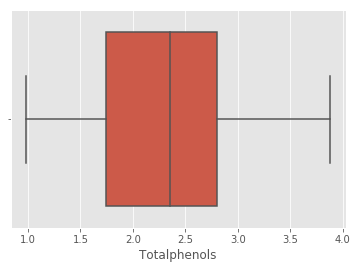

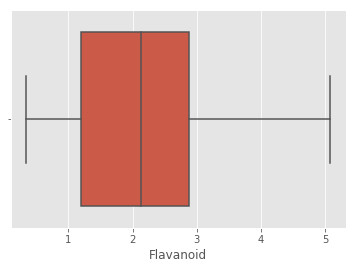

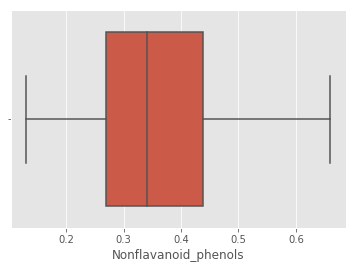

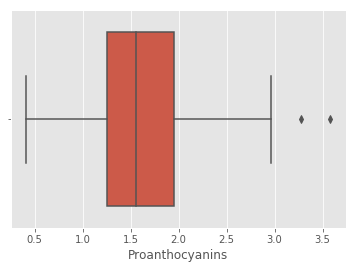

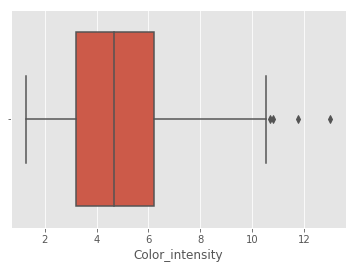

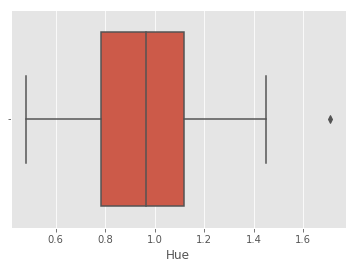

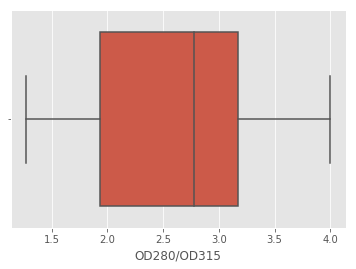

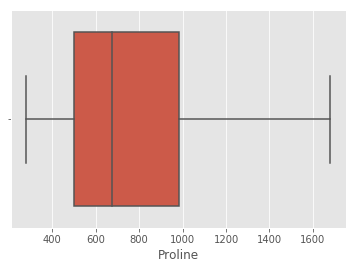

In [18]:
#detect outliers using boxplot
for i in data.columns:
    #print(i)
    boxplt=sns.boxplot(data[i])
    plt.show() 

### Feature scaling

In [12]:
#######data scaling
data_noclass=data.iloc[:,1:]
scalar=StandardScaler()
scalar.fit(data_noclass)
X_scaled=scalar.transform(data_noclass)

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [14]:
df=pd.DataFrame(data=X_scaled,columns=data_noclass.columns)


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Totalphenols,Flavanoid,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [35]:
df_new=df.drop('Class',axis=1)

In [36]:
df_new.head(5)

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Totalphenols,Flavanoid,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [37]:
y=data.iloc[:,0]

In [41]:
print(df_new.shape)
y.shape

(178, 13)


(178,)

### Model 

In [42]:
#train-0.8 test-0.2
X_train,X_test,y_train,y_test = train_test_split(df_new, y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [49]:
###model
knn=KNeighborsClassifier(n_neighbors=5)
####stores the train data points
knn.fit(X_train,y_train)
####predict
y_pred=knn.predict(X_test)
print("Accuracy score : ",accuracy_score(y_test,y_pred))

Accuracy score :  0.8888888888888888


In [46]:
y_pred_train=knn.predict(X_train)

In [47]:
accuracy_score(y_train,y_pred_train)

0.9647887323943662

In [51]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 1 14  3]
 [ 0  0  8]]


(142, 2)
(142, 1)
-3.4342353470856977
-2.432983049556717


c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


(142, 1)
-3.4342353470856977
-2.432983049556717


c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


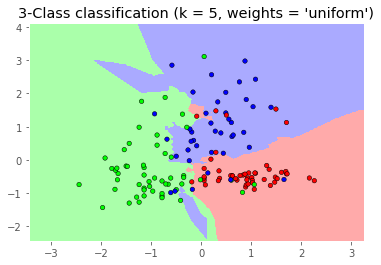

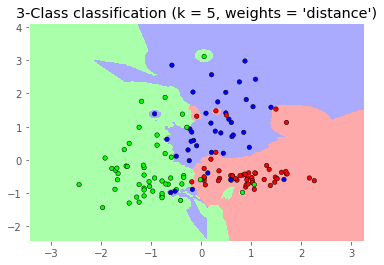

In [95]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .02  # step size in the mesh
Xtrain=X_train.iloc[:,:2]
print(Xtrain.shape)
#ytrain=y_train.iloc[:,0]
ytrain=y_train.values
y_new=ytrain.reshape(-1,1)

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors=5, weights=weights)
    print(y_new.shape)
    clf.fit(Xtrain, y_new)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    print(x_min)
    print(y_min)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (5, weights))

plt.show()

In [81]:
y_train.shapedata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYAAAAEJCAYAAACdePCvAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3Xd0VMXbwPHvbnpvpBNCICSEEqoiRTpIVUSKCIoI+iIioigE6dK7oCjSBRX5BaQKqKELSAdDgJBACBACIaSQkLJJdt4/Qtb0uunzOYdz2N17Z55smefemblzFUIIgSRJklTtKMs7AEmSJKl8yAQgSZJUTckEIEmSVE3JBCBJklRNyQQgSZJUTckEIEmSVE1VigRw9OhRFAoF9+/fL+9Q8vTuu+/StWvXMqtv5syZuLu7Z3nO19eXunXroqOjw7vvvlum71vt2rWZM2dOqdeT4eOPP2bs2LGaxx07dmTUqFFlVn9Fd+fOHRQKBX///XeR9lMoFPz000+lFFXZy/4+FPd9qSxCQ0OpUaMG4eHhhdpeKwlgy5YttGjRAisrK4yMjPDy8mLp0qUU9hKDn376ifbt22NhYYGJiQmNGjVi4sSJhIWFaSO8Kunzzz/nn3/+0TxOS0vjvffeY9CgQdy9e5cVK1bQpk0bwsPDcXJy0lq9o0aNomPHjjmeP3fuHJ9++qnW6slPYGAgGzduZOrUqWVSX35q166NQqHI8q9du3blHRYuLi6Eh4fTqlUrrZft7u7OzJkztV5uUWUc4BRFUd+XOXPmULt27WJEVzYyEtqdO3cAcHV1ZdCgQUybNq1Q+2slAdjZ2TFt2jROnTpFQEAAPj4+TJ8+nZUrVxa478iRIxk5ciTt27fnwIEDXLt2jZUrV/Lw4UOWLl2qjfCqJFNTU2rUqKF5HB4eTnx8PL169cLZ2RkLCwv09fVxcHBAqSz9Ez1bW1tMTExKvR6AlStX0qtXLxwcHMqkvoJMmjSJ8PBwzb89e/aUd0jo6Ojg4OCAnp5eeYdSoVSH92XUqFH89NNPREZGFryxKCX9+vUT/fr1y3eb7du3C0Bs3bo119ejoqKEEEIcOXJEAOLevXtCCCHUarUYNWqUqFOnjjA0NBRubm5i8uTJIikpSbPvvXv3RP/+/YWNjY1mm0WLFmle37Vrl2jatKkwMjISFhYW4oUXXhAXL17MN95ff/1VNG/eXBgYGAhra2vRo0cPTYzDhw8XXbp00Wx74cIF0aNHD2FraytMTExEy5YtxYEDB7KUl18MKpVKfPrpp8LZ2Vno6+sLBwcHMXjwYM2+M2bMEHXr1hVCCLFx40YBZPl35MiRHO+bEEIEBweLAQMGCCsrK2FkZCQaN24s9u7dq3m/hw4dKlxcXIShoaHw8PAQS5YsEWq1WlNn9no2btwohBDC1dVVzJ49W1PP06dPxQcffCBq1KghDAwMRIsWLcQff/yheT0kJEQAYtu2baJPnz7CyMhIuLm5ic2bN+f7GaSlpQkrKyvx888/Z3m+Q4cOYuTIkZrHly5dEo6OjmL8+PGa+EtD9r+7ONauXSucnZ01jzPem6FDh2qe27Bhg7Czs9P8LQ8fPhTDhw8XNWrUEKampqJNmzbi2LFjOco4ceKE5rmLFy+KVq1aCQMDA1GvXj3h6+ubI35ArFq1SgwbNkyYmpqKmjVrioULF2pe79ChQ47vQEhISIHf19KQ8f3ObNu2baJu3brCwMBAtG7dWuzevTvL+5Db+zJ37lzh5uYm9PX1RY0aNUT37t1FQkJCrr+rGTNmCCGE+Pnnn8WLL74ozM3NhY2NjejVq5cIDAzUlFnY73dcXJz45JNPRM2aNYW+vr5wdXUVc+fO1bxe2M85JCQkS7m1atUS33//fYHvodYTgFqtFmfOnBG2trZixYoV+W772muvCXd39wLLzN6QpaWliSlTpoh//vlHhISEiN27dwsHBwcxffp0zT59+/YVXbp0EZcuXRIhISHi8OHD4pdffhFCCBEeHi709PTEwoULxe3bt8W1a9fEzz//LP799988Y9iwYYPQ1dUVX331lQgICBBXrlwRX3/9tXj8+LEQImcCOHLkiNi0aZMICAgQgYGBYsqUKUJPT0/zJSkohqVLlwpnZ2dx5MgRERoaKs6ePSuWL1+uKT9zAkhISBBnz54VgNi9e7cIDw8XycnJOd638PBwYWdnJ7p06SJOnDghgoODxa5du8Tvv/+ueX3BggXiwoUL4vbt22LLli3CxMREbNiwQQiR/mV96623ROvWrUV4eLgIDw8XCQkJQoicDeGAAQOEq6urOHjwoLh27ZoYN26c0NPTE9evXxdC/PfFdXNzE9u2bRNBQUFi0qRJQkdHR9y8eTPPz+Hy5csCEEFBQVmez5wA/Pz8hIWFRZaGKzdz584VJiYm+f7L/GPMjaurq7C3txfW1taiQYMG4uOPPxaRkZH57pPd7du3BSBu3LghhBBi3bp1wtbWVjg6Omq2GTZsmKZBTUhIEF5eXqJ///7i3LlzIigoSMyZM0fo6+uLa9euCSFyNnTPnj0TDg4Ook+fPuLKlSvi9OnTonXr1sLIyChHArCzsxNr1qwRwcHBYsWKFQIQhw8fFkII8eTJE1G7dm0xYcIEzXcgNTW1wO9rbnr06FHg+3/8+PE898+eAC5evCgUCoXw8fERN27cEDt27BC1a9fONwHs2LFDmJmZiT179ojQ0FBx6dIlsXz5cpGQkCASEhLEpEmTRM2aNTV/a1xcnBAivT3Yu3evCA4OFhcvXhR9+/YV7u7uIjk5OUs9+X2/1Wq16NChg3BzcxM7d+4Ut27dEseOHRNr1qwp8uecPQEMHDhQDBo0KN/3XwgtJoCYmBhhYmIi9PT0hFKpFLNmzSpwHy8vL9G3b98Ct8vtSDa7ZcuWZUkm3t7emmyd3cWLF3N90/Lj4uIiPvroozxfz54AcuPt7S3mzJlTqBjGjRsnOnXqlOfRa+YEIETuRzbZ37epU6cKe3t7ER8fn2+c2ePo2rWr5vHIkSNFhw4dcmyXOQEEBQUJQJNYMjRr1kyMGDEiS7xLly7VvJ6SkiJMTEzE6tWr84xn586dAtAkngwZCeCXX34RJiYmBZ5JCJHemAUFBeX778mTJ/mWsXTpUnH48GHh7+8vtm3bJurVqyc8PDxyxFeQ2rVri1WrVgkhhHjrrbfE9OnThZmZmQgICBBCCOHs7Cx++OEHIUT6GZ+zs7NISUnJUkanTp3EJ598IoTI+X1Ys2aNMDExETExMZrtr1+/LoAcCeDjjz/OUq6np6fw8fHRPK5bt26O31ZB39fc3L9/v8D3vyjv49ChQ0Xr1q2zPPfNN9/kmwCWLVsm6tWrJ1QqVa5lzp49W7i6uhZY95MnTwQg/v777yz15Pf99vPzE4A4d+5crmUW5nPOy6effipatmxZYNy6he1XKoiZmRmXL18mISGBU6dOMXnyZJycnBg1ahR3796lQYMGmm2HDRvG6tWrEUIUeRAnw9q1a1m3bh137tzh2bNnpKamolarNa+PHz+e//u//+PAgQN07NiR3r170759ewC8vb155ZVXaNSoEd26daNjx470798fFxeXXOuKiIjg3r17dO/evdDxPX78mBkzZnD48GEePnxIamoqSUlJhIaGFiqGESNG0K1bN9zd3enWrRvdunWjb9++6OvrF+v9Arhw4QJt2rTJs69erVazaNEifv31V+7fv09SUhIpKSm4uroWqZ5r164BaN7vDO3bt+f06dNZnmvatKnm/7q6utjb2/Po0aM8y05MTATAwMAgx2sHDx5k48aN7N69mz59+hQYp7W1NdbW1gVul5/PPvtM8/9GjRrRokUL6tWrx86dO3nrrbcKXU6nTp04fPgwY8aM4ciRI3z00UecP3+ew4cPo6OjQ1hYGJ07dwbSB9wfPnyIpaVlljKSk5MxMjLKtfxr167h5eWFhYWF5rn69evnKAOyfiYAzs7O+X4mULzvq7Ozc75lFtW1a9fo0qVLlucKGpAfNGgQK1euxNXVle7du9OlSxf69euHmZlZvvtdvnyZWbNmcfnyZSIjIzUTXkJDQ2nbtq1mu/y+3xcuXMDKyoqWLVvmWkdxPucMhoaGmt9KfrQ2OqhUKnF3d8fb25vRo0czceJEzSwNJycnLl++rPn31VdfAeDp6alpLIrC19eXjz76iMGDB7N//34uXbrE9OnTSUlJ0WwzYsQIQkNDGT16NOHh4fTs2ZNhw4YB6QNBBw4c4PDhw7zwwgvs2LEDDw8P9u3bl2+9RUlW7777LidOnGDRokWcOHGCy5cv07RpU1QqVaFiaNq0KSEhISxZsgR9fX0++eQTmjZtytOnT4v6dhX6b1i6dCnz58/n448/5q+//uLy5cuMGjVKE3NJ5ZbwszcQCoUiSyLPztbWFoDo6OgcrzVq1Ag3NzfWrl1bqJjnzZuHqalpvv/mzZtXmD9No27dutjZ2WlmZRRW586dOXLkCAEBAcTFxfHiiy/SuXNnDh06xOHDh3FxcdFM+1Wr1Xh5eWX5TV2+fJnr16+zdu3aPOso7Pe3qJ8JFO/72rNnzwLf/xMnThQqZsj9+1UQZ2dnbty4wYYNG7Czs2P27Nl4enpy7969PPdJSEige/fuKBQKNmzYwNmzZzl37hwKhSLH966g9zK/eIv7OQNERUVpfiv5KbXpIWq1muTkZCA987m7u2v+2dnZAelnAsHBwfz666+5lpHbjxzg+PHjNGvWjM8++0xzxJXbD87R0ZERI0awefNm1q9fz88//6z5QioUCl588UW+/PJLjh8/TocOHdi4cWOu9dnZ2VGzZk3++OOPQv/9x48fZ8yYMbz66qs0btwYR0dHbt++nWWbgmIwNTXl9ddfZ+XKlZw/f57r169z7NixQseQXYsWLTh58iTPnj3LM+YePXowcuRImjVrhru7O0FBQVm20dfXJy0tLd96GjZsqCkvsxMnTmheK65mzZqhUCgICAjI8VrNmjU5fvw4gYGBvP7665rvX15Gjx6d48eV/d/o0aOLFF9YWBiPHz/O82wyL126dCEqKorly5fTvn17dHV16dy5M8eOHcPPz09z9A/QsmVLbt++jbm5eZbflbu7e55Tfhs0aMD169eJjY3VPBcYGEhMTEyR4oS8vwNF/b6uW7euwPc/r6Pj3DRs2JCTJ09meS7749wYGBjQo0cPFi1ahL+/PwkJCezatSvPv/X69es8fvyYuXPn0qlTJ7y8vIiOji70tPcMLVq0ICoqivPnz+f6enE+5wz+/v6Feu+00gU0Y8YMXn75ZerUqUNKSgrHjx9n4cKFjBgxIt/9BgwYwDvvvMPw4cMJCAjQTGEMCQlh06ZNWFlZsWzZshz7eXp6sn79enbv3k2jRo3Yt28fv/32W5Ztxo4dS69evfD09CQpKYnffvsNFxcXzMzMOHXqFIcOHaJ79+44OjoSFBTEv//+y8iRI/P9Gz/88EPs7e0ZMGAAarWaI0eO8Oabb2aZjpk5xp9//pl27dqRlpbG9OnTs3yRCoph8eLFODk50bRpU4yNjdm6dSs6Ojp4eHjk+57mZ8yYMfzwww+89tprzJo1CycnJwICAtDR0aFnz554enqyZcsWjhw5grOzM5s3b+bMmTNYWVlpynBzc8PX15eAgADs7e0xMzPL0R1Tt25dBg4cqKnP1dWV77//nqtXr/LLL78UO34AGxsbXnzxRY4dO5ajiwnSzzaPHj1Kly5dePXVV9m1a1eep8sl7QI6ffo0J0+epHPnztjY2HDjxg18fHyoVasWr7/+epHKcnR0xNPTkx9//JEFCxYA6UfVSqWSPXv2sH79es22Q4cOZfny5fTu3Zu5c+fi4eHBo0ePOHz4MF5eXvTr1y9H+UOHDmX69Om88847zJ49m8TERCZMmICRkVGRj5rd3Nw4efIkd+/exdjYGGtra5YuXVrk76u2u4A+/fRTXnjhBaZMmaJpUwqaSr5+/XrUajUvvvgilpaWHDp0iLi4OE2XtZubGw8fPuT06dPUq1cPY2NjXF1dMTAw4JtvvmHChAncuXMHHx+fIr+PnTt35uWXX2bw4MEsW7YMb29vHjx4wPXr1xk1alSxPmeAuLg4Lly4wNy5cwsOosBRgkIYP368qFu3rjA0NBSWlpaiefPm4ttvvxWpqamF2n/Tpk2ibdu2wszMTBgbG4uGDRuKSZMmiQcPHgghcg5mqlQq8cEHHwgrKythZmYmhgwZohnsyTBmzBhRr149YWhoKKytrUWvXr3E1atXhRBCXL16VfTs2VPY29sLfX19UatWLfH5559rRvDz8tNPPwlvb2+hr6+vKTM6OloIkXMQ+N9//xWtW7cWhoaGwtXVVaxatUp06dJFDB8+vFAxrF69WjRv3lyYmZlpppHu2rVLU35xBoGFECIwMFD069dPmJubCyMjI+Ht7a0ZrI2JiREDBw4UZmZmwtraWowZM0ZMnTo1yyDYkydPRM+ePYW5uXm+00BjY2M100D19fXznAaaOV4hch9gzG7Tpk2iXr16WZ7LPg00IiJCeHt7i86dO4tnz57lW15xXbhwQbRu3VpYWVkJfX19UadOHTF69GgRHh6eZbvhw4cXaiBxzJgxAsgyHbl///65ToCIjIwUo0ePFk5OTkJPT084OTmJfv36afbNbxqovr6+cHd3F76+vsLW1lYsWbJEsw0gtmzZkqWuzN9bIYQ4d+6caN68uTA0NNRMZCjo+1pWtm7dKurUqSP09fXFiy++KHbt2lXgLKDWrVsLS0tLYWRkJBo2bCjWrVunKU+lUokhQ4YIKyurLNNAfX19hbu7uzAwMBBNmzYVR48eFTo6OprfQ2G/30+fPhVjx44VDg4OQk9PT9SuXVvMnz9f83pBn3NuNmzYIDw9PQv1fimEkHcEkyqXlJQUvL29mT9/fp5HQRVJ+/bt8fLy4ocffijvULIIDQ2ldu3a7Nmzh759+5Z3OJIWqNVqmjRpwtSpUxk8eHCB22ttFpAklRU9PT1+/PHHHOMTFVF0dDSBgYHs3LmzvEPhp59+wtnZGTc3N0JDQ5k4caJm9otUNYSFhfHuu+8WqvEHkGcAklRNrFixgpUrVxIWFoa1tTVt27Zl6dKl1KpVq7xDk8qJTACSJEnVVKVYDlqSJEnSPpkAJEmSqimtDQKr1Wp8fHywtrbGx8enwO198dVW1VJZ8B1Y3hFIUrU3UMs/Q62dAezfv1/rF3ZIkiRJpUcrCeDJkydcvHgxx0JMUhUyUJ6xSVJVo5UuoE2bNjFs2LB8V5/z8/PDz88PQHOpuyRJklR+SpwALly4gIWFBXXq1Ml1ga4MXbt2LdObpkuSJEn5K3ECCAwM5Pz581y6dAmVSkViYiIrV65k3Lhx2ohPqkgG+srBYEmqQkqcAN566y3NjS8CAgLYu3evbPwlSZIqAXkdgFQ0cjBYkqoMrS4G17BhwxLf8EOSJEkqG/IMQCo6eRYgSVWCTACSJEnVlEwAkiRJ1ZRMAFLxyG4gSar0ZAKQJEmqpmQCkIpPngVIUqUmE4AkSVI1JROAVDLyLECSKi2ZACRJkqopmQAkSZKqKZkApJKT3UCSVCnJBCBJklRNyQQgaYc8C5CkSkcmAEmSpGpKJgBJkqRqSiYASXtkN5AkVSpavSGMJFVZ2ZObvDeyVAXIBCBJuSnobEYmBKkKkF1AkpRdcbqyZPeXVAnJBCBpT1U4Ci5JQy6TgFTJyAQgaUd1b/y1WYYklRE5BiBJhXBk9xH2n9pPmn4aXiZejJo0CoVCUd5hSVKJyAQglVxVOPrPR9jNMLbe2krMwhgAHv3zCLsf7Xjt3dfKOTJJKhnZBSRJBQjyDyKmS4zmccpLKQTfDi7HiCRJO0p8BqBSqZgxYwapqamkpaXx0ksvMWjQIG3EJkkVQp36dTA7ZkZckzgAdP7VoZZTrXKOSpJKrsQJQE9PjxkzZmBoaEhqairTp0+nadOmeHh4aCM+SSo7vgNzHcSt1bAWr19+Hb+JfqQZpeEu3Hljxht5l1FO4uKecODANkBBr16DMTW1LrdYpMqhxAlAoVBgaGgIQFpaGmlpaXJwTKq88kgCfYb2ofdbvQHy/n6XY+P/9GkkM2fO4P79yYDgzJmpzJo1RyYBKV9aGQRWq9VMmjSJhw8f8sorr1CvXr0c2/j5+eHn5wfAggULtFFt5ZZXYyGnEZa/jM8m22eR74FNOQ+E79v3C/fvTwMcALh3bzL79//KoEFjyjUuqWLTSgJQKpUsXryYZ8+esWTJEu7evUutWln7SLt27UrXrl21UV3VMNA390Yjt+dkUigfeZwN5NimAhBCAJkTlPL5c5KUN61OAzUxMaFBgwZcvnw5RwKQcpHRuBTUiBSmkaniSSIlJZmbN8+gq6tPvXovolSW0QS2CtLAF6RPnyGcPz+LsLAZgJqaNefRs+es8g5LquBKnACePn2Kjo4OJiYmqFQq/P39ee01OT+6zFXhM4ekpHhmz57IrVuvoVRG07Dh50yevBilUqe8Q6swLCzsmDlzBnv3/oJCoaBv31mYm9co77CkCk4hSnieGBoayqpVq1Cr1QghaN26NQMGDChwP1+qRuOkVWV5tKnt5FCKsW/evIx9+94EnABQKk/x4YeP6NDh9VKrU5IqooFa/pmV+AzA1dWVRYsWaSMWKa9xgdJQmP7tCiIuLh6w0zxWqx2JiQksv4AkqYqQVwJXNAN9y65h9h2Y9V9JlGLM3bu/ipXVIkAAqdjZfUe7dt1LrT5Jqi5K3AVUXLILqBDKawCyuI15KcZ79eo/7N//O0olDB48DBcXz1KrS5IqKm13AckEUBmU50yUoiaDSjJrRpIqI20nANkFVBmUZ199UbuHKsm4giRJ8gyg8qkIR9iFaeQrQpySVMXIM4DqriIcYRfmrKAixClJUr7kGUBlVpGOsvNr8CtSnKUgNTWFzZtXcP/+U2xs9Bg58lMMDU3LOyypCpJnANJ/KtJRdn5nBRUpzlLw3Xdz+eOPV7l69SuOHXufJUuml3dIklQo8paQlV1h1xMqK9njyIgvcxKoKLFqyd27AiEy7n/hwIMHlqSmpqCrq1eucUlSQeQZQFVRUY+yMzf22rjgrALS04sn/SK1dPr6sejoyGMrqeKT39KqpKKdDWSoaPFo2bBhg/nhBx+iolpjYXGF/v07V/ibIsXEPCQ8PAgHB3esrBzLOxypnMhB4Kqqije6FU1CQiwPH96iRo1aFX4Vzn/++YvNm08SFdUWK6t/GDq0Be3a9SrvsKRCkIPAUuGU5ZpCEsbGFtSp07zCN/4AO3b8QWTkTNTqbjx5Mo3ffjtc3iFJ5UQmgKpOJoEqR61OY8eONXz99QwOHdpR5P1TUoyzPE5NNc5jS6mqk2MA1UFFHRuQimXlyhmcOTOYtLTGXLjwBxERqxgy5KNC71+7NoSH33w+c+k2tWqllFqsUsUmE0B1UtD9BqrwVM2qIjVVxc2bBqSlNQYgOfkVLl8+yZAhhS9j7NhpWFl9S1jYzzg4mPHOO/LWkdWVTADVTWG7hIrTdSSTRqlTKnVQKpOyPKdQqIpUhq6uHsOHf6rNsKRKSiYASXtySxoyKWiVUqlDu3Y1OXhwCwkJL2Jp+Tu9erUr77CkSkpOA5XKj0wOxXbjxllCQm7SqFELXFy8yjscqYzIG8JIVZNMBpJUoAp3U3hJ0or8uo+yvyaThSRphUwAUsWV10C0nNYqSVohLwSTKi95tbMklYhMAFLlV8wkkJAQy969m9i370cSE+O0HFThCCGIiXlIUlJ8udQvVW8l7gKKjIxk1apVxMTEoFAo6Nq1K716yYWlpDJW0EVu2cTHRzNz5hTu3h0PCI4fn8TMmQswNjYvvRizSUyMY/78LwkP90JP7zGdO9dkwICRZVa/JJU4Aejo6PD2229Tp04dEhMT8fHxwdvbm5o1a2ojPkkqFXv2/MTdu1MBJwDu3PmCAwd+5Y03PiizGDZuXMGNG9MAOwAOHvyGdu2CcXBwL7MYpOqtxF1AVlZW1KlTBwAjIyOcnZ2JiooqcWCSVGRF6ApKTU0FDDI9Y/D8ubLz9KmKjMY//XFDHj++X6YxSNWbVscAIiIiCAkJwd095xGMn58fPj4++Pj4aLNKSSqW3r0H4+j4FRAHxOLkNJ9XXnmjTGOoX98Nff3jzx+psbc/SO3ajcs0Bql609qFYElJScyYMYP+/fvTqlWrAreXF4JJuVGnqVGnqdHVL2bvZBHGAZ48CWPnzi0oFNC///AyvzOWEIKtW1dx7dpjdHUTGTr0LerVa1qmMUiVS4W8Ejg1NZWFCxfSpEkT+vTpU6h9ZAKQstuxfgdHg4+SZpxG3YS6jJ89Hh1dnaIVIq8NkKqwCndHMCEEq1evxtnZudCNvyRlF3IlhN/F7zya/4jIaZGcG34O3x+KcZAgrwuQpEIr8SygwMBAjh8/Tq1atfjiiy8AGDJkCM2bNy9xcFL1EXIzhPhW/82FV9dXE/ZLWPEKK+KU0Krk7NlD+PruJyXFBFdXNR9/PB1dXf3yDkuqoEqcAOrXr8///vc/bcQiVQKqJBWRoZFYOlhibKG9Wwl6NfPCaocV0Y2jAdA/qk+D+g2KX2A1TAKxsRH8+ONxHj9eCkB4+C0sLb9hxIgJ5RyZVFHJtYCkQrtz7Q4rVq8gulU0ptdNGdxmMC/3elkrZTu6OzK8yXD2TNqD2kBNI+tG9Pikh1bKLk8XLx7jxInDmJubMmTIGAwNTUqtrocPg3nypLXmsRB1efAgttTqkyo/mQCkQlu/fj1hy8NABxJIYPuE7bTt0RalUjuzidv0aEObHm20UhZQ7mcBJ08eYMOGu8TFzQQecvv2RGbOXIGOTun87Ozt62JtvZrIyIzEGYKDg2mp1CVVDXItIKnQVCYqyDQpJ9khmeRnyeUXUGGU46Dw0aOniIv7P0ABOHLnTifu3QsotfosLe0ZNqwVLi4TcHCYzgsvrOGddz4ptfqkyk+eAUiF5qLrQkhwCLgDsWB71xYjM6PyDqtg5bR8tFKZBqSRkTV1dZ+ir29YqnW2adODNm0qf9eZVDZkApAKbbTPaAyWG3D/2X3MhTkfzCzm8QZ+AAAgAElEQVS7dXO0ooy7hAYPHkJY2BQiIoajqxtCkyYhODqOKLP6Jakg8paQUvVURokgKiqM8+ePU6OGLc2adUGhUJRJvbk5e/YQv//uB+jQsWNLOnXqV6xyhBCEhwcB4OhYr1z/pupG3hJSkioRa2tnuncfUt5hcOdOAOvWXSQmZj4A9++vwdr6JE2atC1SOWlpqSxaNImbN70BQf36a/niiwUolVmv2B5YBgd4vlSvab6lQSYAqdpJHxLIvYGqqo3KmTPHiIl5W/M4Lu5dTp9eWOQE8McfW7lyZRhqdTMALl8+z19/baNt257oHPsUXV1d+nXsCAYG+RekBQUlmar6WWqTnAUkSZmUxZFreXB2dkFP778ZSErldZycin7PjkePHqJW/7fab1paXe7evcWhGe156ccfabx+PZ/PmkVCcvnPDhuIb5X9PLVFngFI1UphZoUOxLdER48D8eXstWvsO3AApZ4eo956i5o1agDld1Tatm0fLl2ahb+/P0Lo4+4eQp8+C4pczssvd+eff1YTHf05AFZWa/B+9idT7l3F6vk2Y4KD2XnkCEN7VIzZSNmTgDwz+I8cBJaqncJeGlCchmIgvlwIDOSPZcuYHB1NEjDJ2ZkZX32FjZlZscvVlpiYR6jVqVhZORV78PbChaMcOPAXAL17v4LpudmM9/MjY2GQW8CJYcN499VXtRN0KamMiUAOAkuVS16zbcrxAq2MkIoTglqt5u5dfxQKBS4ujXK9CnrPwYPMiI5GARgB74eFcfjcOQZ27pxj25s3L3Ho0D7Mzc0YMOADDAy0t75Sbiwt7UtcRosWHWnRoiOQnvBCHF9l2r//MiciAhWwzNmZrzp1KnE9pS3jzKAiJoK8u660G6tMAFLpeN7KCiHYu3czgYG3sLW1YOjQsejpGaS/XkpJ4N61e9y+cRuPxh441iv+TV6ydwWlpqYwf/7nBAW1AQSenpvw8VmUY2kHPQMD4gCL548jlUpMTXKuAeTvf4pvvz1GdLQP8Ijr179g5szllW71TjcHB8ZOncrSXbvQ1dNjxoABmrOdyqAiJYKyHrOQCUDSvkxH/Vu2rODPP1ugUg0H7vDgwZd8+eXSrNtpMRHs+3kfO2N2Etc2Dsvdlrzl8RYdX+2olbL37/+Jq1ffR4hGAPj71+Ovv7bRo8dQ4L8f74dDhzL51i3eDg0lVkeHPxs1YvELL+RS3n6io2djzC7MOcfdIFeCg89Tv74W10MqI24ODkwdPbq8wyiR8kgE5T1ILROAVKquXYtCpcpYMbQ29+7ZkZT0rFRWxRRC8NeVv4hbFAdATNMYfp/4e54JIPtJyNOEBK7eu4eDpSV17HN2lURGPkaI2prHanVtIiNP/Ffe84ZjoJkvi2bP5oS/P4b6+ixu3Bid511FmRsXhULgwjgWsJFuPGOtMCP4/IeVMgFUJSWdBFDYOioCmQCkUqWjkwQI0hdEAx2d2FLr4hBCoDZSZ3lObajOY+usjX9QWBjfLl5Mz0ePuGBign63bvzf4MFZGoNOnXpx5sxKoqMnA2BtvYqXXx6Uo1xfBoIhDHwh/9knb7wxiOsX2/OW+hkAXxKHj78vsLDQf7NUOrSdBCpKg5+dTABSqRowoA9r184iMrIHpqaX6NKlHrq6eqVSl1KppK66LpEBkaQ1TEPvjB71jesXat/1mzax5MED9IAeT5+y8PBhHvfsia25uaYxcHNrxEcfxbJv3zRA8Nprr+Lqmnf5BTUgrq5ePLPUhaj/niviHZClUqSNJFBRG/4MMgFI2pdp0bVmzdoze3YdgoP/xdm5IzVreuXcVovGzRzH9jXbubftHu5u7rw6qXBTEQ1SUsiclpxVKmKePcPW3DzLdt7ebfH2zv3q2aI2GLq6+oR5v8aJkz/RKiWFLcYWBNV9BYuQS9Su3VSusVMBFGdcoKI3+pnJ6wCk0lPQgmvlfAP3zNWv3b6dOrt20UWlIhb4sm5dVsyZg67Of8fkpdEvLITg/KG1PLhxkiM3k3n0+B10dZ/SpMllJkyYX+GTQGVq7EqiMJ99mbwXWr4QQCYAqVrLSAJCCDbv2cOtgAAUJiaMe++9Mr1wa/36Bfzxx0jAFgBd3YNMmKBDixbdSr3u4qoujX+G7N+Dcvn7tZwAZBeQJAEKhYLhr70Gr70GlP2c8Li4BKCG5nFqqgvR0VfLNAYpfxldfFUp8ckzAKnslMK8f23R3DSsGA1/QkIsp04dRFdXl7Zt+6Rf6FZEV66c5NtvLxAbOw5IQVf3Pays7LC3F3z22VRMTa2LXGZpK05DeOvBA1Z++y0W8fE8tbDg83HjqGlrWwrRVVGyC0iSSkkxbhITF/eEWbOmcffuh0ASHh6bmD59abFu/Xju3CH8/I5w/foVkpKWAJ5ADC1bLmLixHlFLq+0FScBjJs8mWW3bqELJAM+9euz/KuvtB5blSW7gKRqLXMjra0ziRLcHWz79vXcvTsbsAHg5k09jh3bRbdubxa5rBde6IKHR2O++OJ/JCV5Pn/WkujoivczLU7jL4TAKi5O0+gYAGZxcVqNSyoaeT8AqXLRdvdRCW8NmZysAjJf1WxGUlJSscszM7PB1DQQyLiALRorq9QSRFhxKBQKos3NSXn+OAmIyzbNVipbWkkA3333HaNGjWLChAnaKE6qgCJCIrh79S5pqWnlHUqmDvvCNd6pqlTu+t8l8m5k1he0cF/gvn0HY2s7HUgBnuHktJwOHfoUuzylUocPPxxFnTqf4eg4ncaN5zBmzBcljlPbijtI/um4cXxRrx7THR2ZXL8+n48bp+XIpKLQyhjAtWvXMDQ0ZNWqVSxdurRQ+8gxgMpBCMH3c77ngu0FUi1TqfV3LaYsmIKhadH7uLWqkF1BTyOfMm/GPB50fIDBAwPa0Y7hnwzPWUYJ3L9/k127tqKjo+TNN0dhZVX8FUgrk6o0G6bSqIhjAA0aNCAiIkIbRUkVTMDJAE41PIWqvwqAwE6B/PLdL7w38b3Sq7Sgxj17w53P9ptWbeL2/NtgDkkkcWT1EZRfWOMQ24uOHZOLNWMnu5o1PRg7dkaJy5GkslZmo0t+fn74+fkBsGBB0W9FJ5WPyIeRqOqp/nvCHmLiY8o+kMIerWdb4jNBnQCZupkTaiew98OegCcnTkxg+vRllW79fUnSljJLAF27dqVr165lVZ2kJU3aNsFuuR0RjSJAB0w3m9K6XeuyC6A43TSZ9mmaFMH1vddJ7JtI+u2qPIFegAU3bgzh7NmDtGmj/VsX3rx5lsjIhzRs+BIWFnZaL78iqGoXRVVHFW9+mVShWDlaMeGdCWydtpU03TTaNmtL6+5lmABKqEfLj0g9puLSvv3cDwwl+vhO/rtXlxH+/qd56aU+ud7asbjWrFnA33+7kpTkjr39IiZMeI/atRtorfzcqNVqYmLCMTa2wNDQtFTrykwmgcpNaxeCRUREsHDhQjkILGmXlgZqAUJDr7Nw4Y9ERs4C4gAflMrBNG/uxxdfLNDKwmuPH4cyefJenj4d+/yZNJo0mcKUKQsICbnKwYM7MTY2ZuDA9zE21s4UyPj4KObNm0pERBP09cPo0aMer776tlbKLiyZBMqIlgeBtXLY8/XXXzN16lQePHjA6NGjOXz4sDaKlSStcnX14ssv38PaehCwAViMWt2Na9caEhZ2Qyt1JCXFk5JSI9MzOqjV+ty8eYmFC7dz5IgPv/8+jNmzfVCpErVS57p1KwgOnsfTp/9HZORX/P57OFFRYVopu7Aqwv10paLTShfQ+PHjtVGMVMUlPUviz//9SbIqmW79umFpb1nwTpnuLaANNWt64OLSmKioiZrn1GoD1GrtXGzl5ORJzZrfERTUBbDFxGQrrVo1Yu/enURFzST9mMueW7eG4O9/nBYtXsmzrLS0VA4d2k5U1BPat38FJyf3XLeLjxeAZabHXkRFPcDa2lkrf1NhaW6JKc8GKg15JbBUJpITkpn1xSx+avsTvr19mTF3Bk/CnhRuZy1f/du9e2csLZeRPip8E3f3k9SsqZ0+eh0dXaZMmU/Xruto1Wo6I0aY0b37INKHGP5LMkplYr53RlOr1SxcOIkNG+ry228DmTNnM4GBF3Pdtl49R3R1zzx/lIqt7WGcnQt3J7TSIM8GKg+5GJxUJvy2+bGm/hpo8vyJZ9B5eWdGTx1d+EK0eCYQGHiBI0cOUKNGDfr1e6/Up4KGh99m3rxvePRoHErlYxo0+JkpU5aio5P7SfgPP0zh0KH6QEZfvppmzaYxefLcHNuq1Wp++mklN29Goa+fxPDhI3B19cqxXXmQZwNaVhEvBJOkgqjV6qw3vNVJv8o4X1ps8LPz9GyBp2eLUis/O0fHOsyaNZETJw5iZmZG+/ZL8mz8z579i7//tiLrGkOK5/9yUiqVvPNOxeyGld1CFZvsApLKRLve7XBd5QrhwFOwm2zH68Nez3XbtNQ0Ak/fJCjoDGp1BVh7SEusrR157bURdO48IN/uH3//iyQnfwAcBQKBRAwMptK7d88yilT7fBmo+SdVHPIMQCoTxubGzJw/k52bdqJSqejzaR/sauW8QColOYW5zU9z82Y3FIpw6tefwOTJi/NtMEtCCEFiYhyGhqZavRagJLy8GnPs2AmSkhYDP6Kjc54BA1rmeTP6ikYe7VceMgFIZcbE0oRh44flvYHvQPbtXMu1ax8B6YOYV6/W5s8/f6VXL+3Oa4+KCuPBg2A2b/6Vp0/rYmR0n+HDB9C0aTut1lMcbdr0Ijj4a86fP4VCIXjxRW9ee+2D8g5LqoJkApAqlOjoaKCm5rEQNYmOPq7VOtasWcC5c0bExemjViuAMYAxmzZ9wrJlbSrEmcA774zn7bfTx0i0cYFaWZJXB1ce5f9Nl8pVqiqVhNiE8g4j3UBfOnfug7X1EkAAamxsvqZjx15aq+L69dOcOFGH2NhPUKs/BKYC3wKQlFSLpKSKc4cqhUJR6Rp/kF1AlYk8A6jG9v68lz8C/iClRgpOoU5Mmjup3Nf5r/1FAJ8k9mbPnmmAoH//gTg7534BVHE8evSA5GTPTM84AfFAMhYWtzEykneoKi7Z8Fc+MgFUU49DH7P34V5i5qUv7Rz9KJqNKzby4ZQPS61OtVrNjVM3SFGl4NXGC33D3Ofee02/g9f05xcM+DbVagze3q2xs/uGiIjGgBIdnQ1YW9/Fzm4qo0dPrJRH3OVJNvqVm0wA1VTk3Uieej/97wl7iE6OLrX61Glq5n8+n4AuAaiN1bh95sa0BdMwNjcutTpzY23txCefDObXX79ErdanVauG9OixCSEEe/b8yNWrtzExUfDeex9jbl6j4AKrMdn4V34yAVRTNRvUxHaRLY+6PgIF6JzTwV2LXS3Zndx3Ev/+/qhfTr/Z+a1Gt9i2ehsjJo7If8fMy0Bo6cKwevWaMm1a1jOLHTvWsWtXXVSqd4FYHj36kjlzVuR5sVZlERPzkJiYhzg6emBgUPJkKxv9qkUOAldTZjZmjB00Fs+JntSdUZfux7oz4P0BpVbf09inqB3U/z1hA88SnxWtEC2vCZTZ1av3Uak6P39kwcOHrYmICCm1+srCnj1b8PHZxLRpt5k82YcHD4JLXKa8kKtqqdyHN1KJeLbwZHaL2WVSV9vubTm48CCPFj4CPbBaYEX3V7sXvSAtrw6aQU8vGUgB0i8409cPw8SkEKuVVlAJCbEcPHibqKj0exXfv9+XDRumMnXqwnKOTKpIZAKoJu4F3mPDug2kGKXgbunOO+PfKdP57pYOlkweO5lfZ/9KGmn06tMLj2YeZVZ/TMwjfvvtR9LS1PTrNxRbW5csr48YMYrFi7/g4cNXMDUNoksXK8zNbcssPm2Lj48mOTnz36hHcrJBucUjVUwyAVQDSc+SWPbdMsKWhoEu3L5wG73v9Bg6dmiZxuFU14nPZn9WskKKcfT/9Gkks2bNJixsDqCLv/80pk37LEsScHJyZ+7cr7h/PwALiz7Y29cpWZzlrEYNF+zsLhAXNxAwQ1f3DJ6exR/Uln3/VZNMANXAw6CHRHaI1HzaqS1SubX7VvkGVYb8/HYSFvYFGTdNefhwFnv3rua99yZm2c7Y2BwPj+Ld7zg1NYWYmHDMze3Q1zdECEFMzEP09AwwNbUu6Z9QZEqlDpMnz2Tt2kUkJChwd3dg8OCxBe+YjWz4qzaZAKoBS0dLTPabkExy+hOxYErZ3Thcq4oxBqCrq0v6zV8yJD9/TjtCQgL45psfiI31xsTkOm+/3Yt7fy6i3Z0zRCmVPGnVCtf3DmTZ5/HjUKKjw6lZs4HW7g2cnbm5LRMmFG+MRzb81YNMANWApb0lfd36sn/qflQ1Vdj62/L+V++Xd1g5HNl1hP2n95NmkEYDkwaMnDgy9wuzipgEunUbwMmTkwgJ+RjQo1at5bz++ldai3vduvXcv/81oCQuDnavbsnBuAu4PX/9f0eP4vzSLMIapA/Ibt++nj//fEpcnCf29jOYMGE0Li6eeZZf1mTjX33IBFBN9B7Smy7PupAQm4DlB5YVYsGzzMICw9gaspWYhelXJj/65xF2m+14dfirJS7byMiMWbMWcfjwb6SmptG58xxMTa1KXG6G5GQzMs+o1k9O1jT+AI2Tkrh8/z66DdIHZw8dCiMmZjoADx50Z9OmKUybVvazc2RDL1WsVkAqVYYmhlg7WVe4xh8g8N9AYrrGaB6nvJRC0K2g3Dd+fvQfHh7EjRt/k5hY8AJuhoam9Or1Dq++OkKrjT+Ag0Mq8OD5o1hSbZzYbpx+0ZUAfG1saN0kfWmLhIRYkpNrZtpbl5SUsp+dIxt/CeQZgFRB1PWqi9kJM+Iapzfmuld0qeVcS/N6wMkAwu+H07R1U2oAW7Z8w9Gjujx7VgdHxylMmvQpDg5ueZReuj7+eAo//LCYiIg0LCzSGD36FxKPfcb0M2dQKZX07d+f2vb2nCN9do6DwwWCg/sDlujpncDLy6HMYpUNv5SZvCl8BZYYl8j+X/ajSlHR440eWDlq98i1otn38z7+uvIXakM19ajH2JljUSqVrF20lhNuJ0hqkESNX2vwdur3bPj+PrGxGffBTaZZs5lMnjy/XOPPLLeGNuMq2vj4KNavX0l8vJr69WvRv38eYx1lEJNUycibwlcPSfFJzJw0k5AvQsAY/pn3D9O+mEaNmlV3gbI+Q/vQZ2gfhBCaBjE2IpbzOudJGpgEQORXkewZ6UNycubG3oCUlNK5ZWReMjemqtRUzgcHo6urS8s6dfLsYsvYx9d0IJ98MrPU45KkgmglAVy+fJmNGzeiVqvp0qUL/fr100ax1drxvccJ+TCEjNHE8Hnh7Ph6B/835f/KN7AykPloWJWoItUiNdOLoOugi6PjUUJCXgHMMTT8naZN65ZqTHk1rAnJyXw+ezZ9bt0iSUeHbQ0asMjHB518xlkG4luiNXVkIy9pS4kTgFqtZv369UydOhUbGxsmT55My5YtqVmzZsE7S3kSQmQdolc8f66asXGxwdXflat3r0ItMNlmQptGbWg7ZSYbNiwlMVHg7e1J797DCyzr4cM7bNiwmuRkfTw97Rgy5KNCdb3k1+Cu2b6dyTdv4gKQloa9vz97Tpzg9Q4dil1mdvIWi1JpKXECCA4OxsHBAXt7ewDatGnDuXPnZAIoofZ923No4iHuTL4DJuAw24E3PnujvMMqc0qlEp+FPvz63a88iXnCCy+9QLte7cDXlvHjZxW6HJUqkcWLl3Lv3lJAn+Dg0yiVq3nzzZLdAOdpbCyZh3BrpqURGBOT5/bFIRt/qbSUOAFERUVhY2OjeWxjY0NQUM7pe35+fvj5+QGwYMGCklZb5RmZGTFzwUz2/rSXZFUyvb/ojY2zTcE7VkH6hvq889k7JSojPDyIx487AOl3IUtJac3Nmwfy34mCG9++Xbuy5MoVfKKjSQNW2dnxcZs2JYpVkspKiRNAbt0SuZ1Wd+3ala5du5a0umrF2MKYwR8NLu8wKp5iLAhnYWGHkdEBkpIynnmGsbE6v13Sq3reV59XImjm4UHi2LFM278foVAwYvBgXGwr7yqiUvVS4gRgY2PDkydPNI+fPHmClVXVnq4owcNbD7l38x5uDd2oUauMZybldWOYfBKDpaUDPXs68Mcfc0hOdsXW9gyjRk0tXHUFnAW0adyYNo0bF6qsyirzzCyp6ihxAqhbty7h4eFERERgbW3NqVOnGDdunDZik0pBqiqV47uPE/c0juatmuPcwLnIVwYf/N9Bfgv7jZiXYrDeYs07Ld+hzSsVoNujgDWC+vUbTpcuT4iPj8LW9k10dXNOHZX97VlFx8cze+lSzB4/JtbQkMHDh9O6iie76qTECUBHR4f33nuPuXPnolar6dSpEy4uLgXvKJW51JRU5kyYwzWva3ADtj7aitMKJyZPn4ytS+G6LYQQHDh3gJjF6QOdUa2j2PXFroqRAKDAJGBmZoOZWfUcSymOpatXMy0gACvSl7WYsG4dzZcswUCvbK+7kEqHVq4DaN68Oc2bN9dGUVIRqNVqFAqF5tQ8ITaBgFMBmJiZ4NXWK8cp+4W/LnCt3zU4CKwENWruJ93nh+k/MHVR4bpDhBCkmaRleS4qIUorf4/WZO8iKuSYQUFH/0IIhBAVci2l0qKMiSGjQ1cBeMXH8yg2llo1qu4FidWJvBK4ElKnqflm1jcEKYLQSdahU/1OtO/enjlz53B/2H30IvRo9mUzJsybkCUJpKSkpF9bkPlmV4aQYJhQ6LqVSiW2j2yJCIwAT+AiPEt7xpGdR+j0eiet/Y0VzZY9e7h66BBGaWmkubszc9y4fC/2qjJsbHgE2ANq4IqpKT2QYwJVhUwAldBv637jnwH/kOadfiS+Z80e/Of4c3/JfTCGFFK4rL7MjdM38GrjpdmvZZeWuH7hSqg6FJIBA+A2OOs5F6l+7+beBPwaAGmAM6StSsP/K/+KmwAKcUaQ39H/1dBQnu3ezcK49IXqrj55wprt2/lw0CCthlkRTfzwQ+YkJ6P/6BFB8fHYPnvG7smTCXJxYaGPD4b6+uUdolQCMgFUQnfD7moaf4B4q3iu37sORv9to7JVkRCX9cje0NSQGfNm8OOiH/l36L+YuplSx7wOH0z8oEj1ezTywNjYmISh6eXrntPFrU75rMRZLBkJwTf/KZ4ZAkNCaB3335LTjdLS+N+9e4WuLuDOHX7dsQOFQsFbb7xBfVfXosdcTkwNDVng48OF4GCuzpnD8IT0z/xubCyrtm5lwvCCr8DOLjUtDR2lUp5BVAAyAVRCHvU8uPj3RVTt0m9zqLNTh9TPUuEb4GPgGbj84kKDhQ1y7GtqZcpH8z8qUf0NWzekx5UenJx8ErW+Gi+lF72n9S5RmeVCkwjy38zbw4M9lpY0eX6F7yk9PerWq1eoKoLDwvhp0SLmREYigC9v3eLDadNwcyi7JaC14W54ON4J/x1Q1AJiIyML3C85JYWHMTE4WFqio1Qy7euvMbp9mwQdHRp27crbr5b8hj9S8ckEUAn1Htabx0sfc/XPq+gk6xBfI57ITpHpo3QzQP+6PhMXTsTIzKjAsorrzdFvMkg9CAQodap2X3g9Jyc8hg5l0u+/Y5CWhmmDBnRu2JQRq/ZjYaLLrEHtsHh+A5jsdv31F5MjI9F5/viLx4/ZeugQ44YOLfW4j1+6xOG//8bWzo7333gD/ef3Qb4RGsrmXbtISE3l/wYPxqsQy7a09PJibY0aNI2MRAH8bmREk+c3ucnLxcBANn//PY3j4ggwNUXXzY1R587hoU6/AO+73bu51rw5DeSyMeVGJoBKSKFQMOLzEZrHq+et5qj/UdQd1dAQFCMULNy4kKY2TXn7k7dL7VS7qsyG8R2Y97VlGfp26EDf5wu8nQq8w+uLH3M/ai0Qxckb4zj+VV+McukPNzMz4zGQcdv3x4CZeencBD5RpcLvwgUUQNKzZ0Rv3cr0uDhuAxODglj25ZcE3rvHmq++YmFcHM+AUefP89b77/NG5875lu1SowY9P/wQH19fDNRqajVrxqgCruzfsnEjyx88QAGIuDiGxMTgoVYTAmwEouLieHbiBA2GDNHOGyAVmUwAVcAHkz7A5FsTrq+/zp3IOyT/ksx98/s8PvQYpx1OdB2g/SU4kuKTOLjtICqViu6vd8fSwVLrdZS2It5bXmPZvmvcj1pP+pQqO87fHsMh/7/o08I7x7bv9O3L55cuMSAoCLVCwU4PD5b26FHi2DNLUqn4cd8+/vzjDyZERwMw38iIbYmJKAF3oMnt29yOiGDb7t0sjotDl/RVkaalpTF727YCEwBA68aNi3QRmFlSEhmHHgrAQUeHncBxYCGgB0zet4/zTZvS0ssrr2KkUiQTQBWg1FHy9idvs3vDboI7B2sON5M7J3NtxjWtJ4CkZ0nMmjiLW5/eAhM4Oe8k0ydNrzCL1aWmpLJ20VpCk0MxSDDgvVHv4Vo/58Br5sa/MGcBGfR0AFLJWFhOqUzEUE8n122N9PVZNmMGJ65eRaFQsKxRI01XTG7S1GqWbtjA3YsXuRETg66eHh4NG7L888+zTDvdffQo//z5JwohuP70Kc0eP2Yx/83wXZyYyM/A+88fJyqV6OvqotTVRcV/P/xEwEhd8JpIxZFkb0/EgwfYAVGAsnZtVgQG8n1KChnnSvNSUvjqr79kAignVeMcXgLAo6EHJsdMNI/1TutRz7Nwg5VF8fe+v7k1+hbUA5wgfH442zdt13o9xbVp+SaODjjK7Um3uT7vOiu+W4EqSVWiMkMfPWLasmVMW7iQvg31cXcYA9xCR3mKTg020qlR3g2YgZ4eXZs1o0vTpvk2/gDfbd1KVz8/mkVGMjY1lQOJiYw8f54xs/5b+vpSUBD3fv6Z+cHBzLt1i1cfP+YxkHkFLhvgT0ND7gB/6OkR4e1NDTMzRgwaxHuGhgQBF4D1gLSSUv0AAB+ySURBVKO7e3HfFo2TAQH8+tdfhEZEaJ6bNn48q9q0YbqHB8tbtWL6hAnYm5oSkWm/KMDQxCRHeVLZkGcAVYhXKy/6+PfhuM9x1HpqGho2pMeX2u1ugPQrkLMcOihBLfI+ivQ/7c+FUxeoU68OL/d9uchjEkGXgzh1+BSOTo50HdS1wLGHO4/vIFYJcAYiIMIsgsd3HuNcP+/rHfI7+n8SF8eSefNYEh6OAbAsMJAl773HrZhvsTHTZ2i7fgVeFJakUhEaGYmDpWWeA8YAkSEhNFer2QmMfP5cE8AmJIT4pCRMDQ05deECA2NjNfsMA64Bc4H5pC/ZMN3CAidPT9YaG/NikybEHjnCyvHjidHV5eU+fZh39Sqq+Hgaenkx4d138429IIvXr6f2sWN4JyWxwcaGHmPG0LpxY8yMjJg1fnyWbd/o35+vf/yR6NRUzIH1dnZ8p6UxACEEu44d4/adO7R74QVaNWyolXKrMpkAqpg3Rr1Bf9EfyH1Zbm14uc/L+E3y486UO2AC9rPsef2T13Pd9uC2g/zv2f+IHxWP/jl9rs2/xugvRxe6rjN+Z1h/ZT0xI2PQCdTh3y//ZcL8Cfn+bRFBEfAjYJH+OHVMKvpGxb9g6dD584x43vgDfBofz2fHjrF8ypRC7X89NJTvv/6aVtHR3DA15aVBg+jdvn2u2yrNzXkCpGR6LgUISE1lwfTpJBka4tmyJRcMDOiVnAzAGaAm8DLwhr4+OhYW9IiN5c2zZzloYsKOe/eYf+sWGelvmZ8f0+fMwc3OrsjvRXaRT5/C2bMMTEriFPDsyRPWLl7M6c6d+XT48Byf06BXXqG5tze7/vkHJxsb1r30Uq6D58Ux5/vvaXfyJKNSUth24gT3hwzhDbkEfb5kAqhCUpJT2PLNFh49fUQt21oMGTOkVKZoGpkZMWPeDHZv3o1KpaL3Z73zXEzu2JVjxM+LB0DVVcW/p/5FlaRC37BwP/oDhw8QMy99/n1aqzRuXLpB5N1IbF3zXrzOtr4tMRb/3ZVL9wVdUpJS8tw+N4kqFZ8d/ZG7RJJ0K5GPgYzVrmKBO+HhhS5r/fr1LA8LS58KmpDA59u306Ndu1zPGsaPGsVrQU+4HmHEHvGUjQTzg0LBotRUPO/cIQ0Y9fAhtVu35oK/P7pCEOvhgbOTE4cSE1nWvTuzZ84kTKViCTDq2TP+CAvDmfSlHJ4CTWNiuPPoUb4JYO+xYxzfswej1FSEmxszPv4YXZ2c4xxJKSmYp6XxEDgALAYUSUn889dfbDA3Z2T/9IORyb8cZdfZ9L+3fyvB3CG5HzAUV3xSEjr+/nRKSf+cP4iL48sjR2QCKIBMAFXIsunLuPDhBagNV65eIWZuDB9NL9lFX3kxsTThrXFvFbxh9gP1bI/jnsSx95e9qNVq+rzZB0v7rLOJsh9BCmXB90V2tXQlKDgoffpLGthesaXGm0VbvOz13xfzx8Ir4AK6Z5U8GAipd9P72bcDdWvVKlQ5j2JiuBUayizAFPgUcFSpiE9KyrUraMvxAE5HT0Yl3iaCuP9v784Doq7zx48/BwaGG7lCBBTFa02lTMwz00hLM9P17PTbtq5L2nqlpHLkQR7oupWWlrrFbofsarodWv7UzLJUFDNFUxAERbmEgWEGmJnP749BBDlmgJEB5v34R2f4HK/PDLxfn8/7ZJjraKY7XqJHtmHQlS0woqCA/WlpvLN2LfZ2drg4OFTu/90vvxCiVDIfw2wfCwG9nR3/LCvjlF5PJ+CorS1Lquxzt/ScHM59+inr8g2T/CXfvMlmH59axy74e3pyvlMnnM6eZRR3vt6B5eV8XbEy4H9//o1N+x6lSGNodX9332cM6HqO8aFmrqK5a3EqmSRxPS+Pdz74ADu1GvegIOa+9JJ1zOFkIvFJtBF6vZ4MpwwIqnjdW0+qLrVZY9i/cz8RSyJYvGwxez7aA8AjvR/B5Z8uUAR2h+zoI+tTefdffKuYmMgYvpj0BXuf3UvMyhgKblRfT3f08NG029gOlGB7wpYeKT2MLkDz8vyXGfbJMIKiguixqAevvfJajSqg5D0n+Hrq30l9YhtPxmuq/UxTVsb5zplQMau5doCerL6GP5YSDP86uroa/TwkSWL5mjXEq9UsB54GYoE0b++6B44dv0VZ2QsVr1wp177KRVsVhVW2uQTMSktj/7Fj1Qp/gB+OHmV+RUGowNA+4Hb//Xzr6Mg/gAXATp2Oz/71rzrjvpiZydD8OzO8/kGvJzczs9ZtZTIZEbNnsy8khO+rPCFkAC4VM4YePn+dIs2TlT9Tqsdw6Nz1Os/fGC4ODpT37s0ROzuKgW2urvQZPpxVa9YQeeoUy5OTeXz/fv7+z3+a9bytnXgCaCNkMhny4upfp1zVfF9v8vFkdhbupCjWMGdO9mfZ+B/058npT+L/oz+J7yfSuWtnhi8dXrnPt//5lozXM8DP8Pr68ut8se0LZiycUbnNwFED8fD24KctP+Hn78eo2FFG2zbk9nLmRM2p8+e//usIvvM+Iiq3iJvA4itX2BgTg11FDx07uRzFrSrz3UvgX2AYxFWC4a56R4nxGVRzi4romZeHS8XrnkCaszPrFi2qc588eTvuzNQHOF9GNcSbl75TMriwkJvACKADkKLR1NjfztGRQiqbP0iXy5nw+OMc+f13VqtUqIH7AEeVqs4YegYG8omnZ2USSLaxwaeO0brJ6el8uGEDs7Ky+MzOjnB7e4IcHckKCCD2BUMiG3G/P9u+P4Ba/QwATk4HGHF/hzrP31hRr77Krl69eC89nSH9++Pfvj2qhARup9q+ej3/uXLF7OdtzUQCaCNkMhnjBo8jYU0C+QPy8f7em0ljJzXb+U//cpqiaXcmTFNNUJG4LpH+I/vTd0hf+g6pOUjKRmZj6LJymx4Ksgr44K0P8PHxYfBjg9EUawjuHUyPfj1MiiPz90z2796Pq6sr42eMR+GkqLHNzfgfWJFriNUXGJGezvnMTEKCggCwtbHhNZcneGvlHm4MukXAF14MuFTGXzDs852DA71M6GHi7uREpuLO+csB76AgvOsZCfzfl4MIWTaJ4uJXwf1X7Pp/zLP+Q5kUHcqmVatYnZeHDojo0IGoRx+tsX/4Cy+wJC2Np69e5bpMxlc+PsT5+LBWreZDDB2jkoCYehJYR29vej/7LK/v3YtTRRtA1LRptW77UXw8a7KykAPDystZ6+TExOhouvr5VW4z8eH7mZtygC9O/D/D6wES40OH13q8ppDJZNUGtBWp1aRV+fxLgdJ6qr6skUgAjXDgvwf47uR3SHKJh/wfYuqslrFw+2MTHiMkI4Ssy1kEzgo02+jco18f5cvvv0Sv0NPbs3et00sEdw9GcVxB6VhDzxS743YEdw+u97ijJo/i6BtHubr4KtiB5zxPzj14jsK/FUIKfD7/c+RT5XR4vwNLY5bi5lP/FAqpZ1OJ+yyO3CW5kANnXj9DzIYY7BTVV6/yzrFBB5Xz8xTK5TV6oswJHcO47P6kHrlJ75CO/Ob4O6/v3k1hTg4Fzs5MNqEe2V4uZ8jEiUT+5z90V6s54eHBnD/9qd59urS/j/S/T2De3tXkypRM7z2G5/saegyFL13Kmi++wMbWljemTsWnlkQit7XFPSCAldevE1VWxrasLGJWrqS7XI4/cMwe5j8Eqf6FPP/122wfFV7r2ISnHnmEp+roqQR31gOw1+mqFSL+5eXopZrtNLHPDifWhCYjc3J1dKTv+PFE79lDsFrNcU9PFhr5/K2NTJJq+baaQUIrXXs15UwKbx19C+WrSgAcv3TkZf3LDH/a/Hc0LcH1S9eJ2R1DwSJD3bz99/Y8d+05nnz2yRrbbo/bzsnCk+g1eno79ebVmFeNVtcU3yrmm8+/Qa/Xc+HKBc6tPXenJfFToA/QCQbHDWbum3PrORKsj1zPLzG/VJbsskMyInQRPBj2YLXtMpPSyBodx4vZ2aTa23Pq4YeJmVN3lREYCrwFsbHMOXOGzsDXDg5kjhvHzMnG55JQlpRUrqJ1L5dSLC0vZ15UFA+lpBAK3H7mKgUmOTjwqUbDQ2Ph9/8BMrD5XcZf4sLY/Pif6z7oXU6eP0/8jh14qNUUeHnRvXdvAr/8knFqNXlAZNeuvL1iRa09hiylQKUiR6mkk4+P0YF4LZ4Jv28NIRqBG+jsybMon1JWvlaPVfNr4q8WjOjeupB0gYIn7zTMlg0vI/licq3bjps6Dpc8F3SddFwsuciP+340enwXDxcmz5rM1PCpyO3u+uPUYvgNdYUSyXidu0wmq1alJNPJah00FvBAEF2TVpA8axZur79O9OzZRo99S6Wi49Wr3F71YIxGQ2ZSktH9ANycnOjm53fP19E9k57OqLQ03DCs1XObDvDp2JFlbm5kTKQyweq7SyTbmN4Yq9Pr+fiDD9iYnk5MdjYrkpO5mpKC+rnniOrfn82PPspby5a1qMIfoJ2zM938/Fp/4X8PiE+kgYJ7BON4zBF1JzUA8pOtbDGUBgrqFoTLzy4U9zH05bdJtsHf1x+9Ts/Z789SXlZOn0f6oHBSsPXdraRtSAMHKKSQzxd9zoARA0zu8z/+6fFkrMggf1a+oatLEvA8KL5RENKj/qmHASY/N5nUN1LJXpANOdBjTw/u31B7Xb2HnweTTZgA7TaFXE5hlYJNAjQtrDvhwZ9/xlOn4wUMvX3+hqHr6Ro/P5bPncutkhJ2nl6JmoqEngt+paZXE+YXF9NNpap8QHMF7AsLmTJqFFNGjTLrtQjNQySABuoztA+j3h3FsSXHkBQSPaWejIkaY+mwUOYqkclkuHoZ757YEF0e6MLYxLEcjjiMzklHV01XJkZPZNWCVZwbcw69i57OCzsT/VY0JYoSqNLGpumioTi/GM8Oniadq/fA3iz1WMrRnUdRyBRckF9AG60lJDiEsS8ZX3AmsEcgkbMjObzrMK6urjwe93jNp4oqNGVl5BYV4efhYbRvuLODA95Dh/LRt9/yQEkJe7y8GFcxyKmlKPrtN9TAfgzdP/8GPBwWxpIpU2jfrh0BQFzhi8S89Dkq1zK65/nx/hOmV/94ubhw0dUVfUEBNkAeoPNqGRMACo0j2gAaSa/To9fr6y1gmiUOvZ6NkRu54H0BdNCnuA+zo2ebfRoIvV6PXme43u93f89mxWak3yRD15ZR8OShJ1GXqTk8/TAEA6XQaX4n1ry95p6MRr568So7PtxBmWMZwW7BzJg3w/h5qkz/efToN3z++WHU6mDatTvDwoWvM6f9CaPnPZWSwpWMDPrffz+dfOoejdwUdU1RbWy20iVLlrDq8mV+wFA4H/P0ZPnbb1dbt/fzb77h1y+/JKC0lN98fIh5441aG5Prcj4tjQ+2bsVNrUbt48PSuXPrndtIMDMztwGIJ4BGsrG1aRErYe3/dD8nxp9AN8BQ6/vzoZ8J2RvCI+Pr7sHRGDY2NpX16fk385FOSrAWwzrEkZBTnsO8tfMgDjJLM3HUODL95en8+L8f8b7Pm56DepotKRXfKiZ2YRz5L+XB2HJSL6Riv8me5197vu6dqpSqWm0ZO3ce5ObNdQAolaVs3bqM9lHrjK4P3C84mH7B9fduaqz61iYwZarqAY8/zuacHP5YWMhJhQLv/v2rFf45SiWX9u5lVV4eAEqlkrVbt7Jy4UKTY+wVFMTfY2NN3l5o2UQCaOUyr2ai++OdJr/yPuVkfGL6guWNNh+4XbOzCqQICTuFHeFLwwFIT04nblscN5+9iSJVwaBVgwhfFt7481WUjuXlpSxf+hfy0/8NX9pB6Dx0BxNJ3Z1aY1ug1lVfVKoCNJqq6wMo0GgMy2cmMNloErgXmlL4l5aXk3XrFk8MGUJyQAC7T58mOCiIRQMGVNvuRkEBPaoMAHMDbOoZECa0fU1KAMeOHSMhIYFr164RGxtL8D26MxLqNvDRgfwc/zNFfzYMUnL/xJ0BjwwwslfTuHm6QdVBqGXg4eNRbZtP4j/h5uqbIIfSfqWc3HqSGyk3aB/csMXQdZ9N4MMP15GWFoVCoaZ79/akpc2nspPjid0Q0x8Xx4rxtneXpLWUrK6u3nh4JFNQoMbwCJNCQIB5ZqRsjMasSnbbj2kXeCX5fXJClXgdcmVz11f465QptW4b7OvLh97eTMjMRA6ctrXFW/zNWrUmJYDAwEAWLlzI1q1bzRWP0EB9BvXhuRvPcWjZIdDD6KGj6faA+ReBqWrYuGEcXHiQS/JL4AT+G/2Zsqx6oaOT66r9dmk9tZSqSmsca/eO3Ry9dBRsoL9ff6a/WmVu+ITJfPRRHIcOPYNe/wdAS0bGRKDq/PGeuO0J5JVjr9Qd8O1b6IqS1sbGhkWLlrBly5uUlCjw91fwyiuvN+xDMJOmFP4AL1zbwZVt10EGeVIxf5r3MWnB62rd1kmhYPb8+SzZvh3HsjLcgoOZ+2wzj84SWpQmJYCAOuYHEZrXyAkjGTnB9C6NTWXvaE90XDSHdh+itKyUEW+OqNH7aMiDQ0j9OJXiF4shBwIPBeI/vvqCLGeOnmGv3V5UsYZqiNy9uXT8uiNDxgyp3CY9XVlR+APIKS8Pw8srlry8DYAtnp4xLP3rv3E71MNQ0Fet8qmn7sTLy58lS1Y3+bNoiqYW/gmTofRsKVUX3i11q5lkq+oWEMDaqKimnVhoM5qtDeDAgQMcOHAAgNWrLfuHJzRdSWEJV1KvoNVpKcgtqJEARkwYgcN+B36K+gk3Rzeee+u5Gj2mzp0+h2ranTpo9RNqzq49eycBTE7AZZ0OKMLQ6xxcXXNZsOAV9u5diSTBhAn/R2BgxTxB9VX/3E4OtW3Xghmr//fV+HI9+7phhrc88FHdm55JQttkNAGsWLGCgoKCGu9PmzaN0NBQk08UFhZGmFicoVW5kXqDX3/5lYCgAHoN6lX5fnF+MctXLifzrUxwgOTIZCL+L4LAHoHV9h80ehCDRg+q8/iB/oHIvpYhvVTRE3kf+Pn6Vdtm5pedyR8cQV5eD+ztM5k4cQhdujzA3LkPNOxiqq763goTQW0mJ4A6ci5b1m8hT8rDQ/JgX1/TV1sTBKMJIDIysjniEFqY00dOs+X7LeRPysfhVwdG/jySGfNmAPDDNz+QOTvz9k05Octz2Lt6b4MXn7mRc8MwluAolfP35ATlVNvG/T53Yi8Npyi3CKcDK5HL72qsrXqLbKxAv7tq6O5EUPm6QZfRKObKPS/uc+TF++ufI0kQ6mL5juxCi7Trq13kL8uHP4BmqoZfSn6hRGmYj0dhr4CqvQfVYG/X8F406ly1oepiC/Ae0BOKc4trbCeTyXDzcUM+fc+dN6tW6TRUXaVvxfut/MFAEEzWpDaA48ePs337dpRKJatXryYoKIilJi6ULbRskr1UbflGnasObakWgGFPD+PQgkNc1F0EJwh8L5CpMQ2fElvmKDPMWXD7NuSvYLfKyIRp9RT60qSdqApUOLk51T5Ir2rJXl8SmJxgSjtyo9V44GjkyF9BaKomJYABAwYwYMC97XMuWEZo11Ayd2VSMrEEWYqMoLQgXL0NdT52Cjui1kfx01c/UVpWypBVQ3Bu59zgcwQEBWCbbIvuPsNANpsLNgQENa5n2c30m6xfu57CroU4pjvy0h9f4sFh1aeBrm1QWK3vV20vuEdqO7yJHZgEwWzEXEBCnY787wiJJxK5z+s+HnzoQcpLy+k5qGetq2w1hl6vZ+OyjZwPPI/eTk+35G4sWrMIW3nDpxN+8/U3ObfyXOVKih3mdmDDhg21TgcN1EwE9bQlmHNksLHc0gy5R2jNxFxAgrno9XqOfXWMW/m3GPjYQLwDqi+2/si4Rxg6dihxb8TxTcdvKG9XTqeFnYhaGYWLp0sdRzWdjY0N81bNI/dqLpJewudPPo2eL6jEsaSy8AfQBGrQFGlwcm/ERGV3PRGYc3oIY4W7KPyF5iQaga2UJEnERcTxrtu7fDz0Y2LeiSHtfFqN7c4cOkPSo0mUTShDGiGRFpvGv9/7t9nikMlk+HTy4b7O9zVpsjhfyReyKl6UQrsr7XB0c6x7h7tL2tqeCKo0NCcgWoaFtkckACuVlpTG2YfOohuug2DIjs1m5yc7a2ynLFSiba+984Y7lJQZX52ruYVHhDPovUF0ie5C72W9WbB4gfmmxBZJQGijRBWQldKWadE5VVk40AZ0Ml2N7foN74ffm35k/SELFOC+0Z2Ro5pv2glTOTg7MG/5vKYdpL4K+NtJIMEys4UKwr0gngCsVOd+nemyrwtcA3TgvsGd0WGja2zn6uXKkgVLGBQ7iNDoUMIfCidkiPHlGdusyQniSUBoM0QvoBZGVaDi7bfeJtchF6ciJ2aFz8K/q7/xHRtBo9Kwc8tOlEVKRo4ZSa/QXsZ3akua0gH/ricBUwaPiQZeoclEL6C27d0173J68WnDYita+Mfcf7DmnTVmX+IRDNUmL85/0ezHtRa3eweJkcNCayWqgFqYPPu8OyttyUHZSYmmWFPvPkIDJUyu/5a9AbfzDSn8RaIQWhqRAFoY1xJXUFe8kMApwwkHFweLxiTUoRF1OiIJCC2JaANoYfKu57Fh9QYKvApwzHPkzzP+TI9+PSwdVtvQ0NL3Hlbai/YAoVHM3AYgEkALpdfpa5/QTGicxtx6W2A+IEGol5kTgChhWihR+JtZY0pbUV8jtHGilBEEQbBSIgEI1kM8BQhCNSIBCIIxIgkIbZRIAIJ1MfcykoLQiokEIAimEklAaGNEAhCsT1P6XxobRSwIrYhIAILQGCIJCG2ASACCdWoBo7BEDhEsTSQAQbAgkQQESxIJQLBeLeApAEQSECxHJADBurWQJCAIltCkBWHi4+NJTExELpfj6+tLeHg4zs7O5opNEJrH5ARxGy5YpSY9AfTt25f169cTFxeHn58fu3fvNldcgiAIwj3WpAQQEhKCra0tAN27dyc/P98sQQlCs7NwVZB4ABEswWxtAAcPHuSBBx6o8+cHDhwgIiKCiIgIc51SEMxLtAcIVsZoG8CKFSsoKCio8f60adMIDQ0FYNeuXdja2jJs2LA6jxMWFkZYWFgTQhWEZiDaAwQrYjQBREZG1vvzw4cPk5iYSFRUFDKZzGyBCYLFiCQgWIkmVQElJSWxZ88eFi9ejEKhMFdMgmB5ojpIsAJN6ga6bds2tFotK1asAKBbt27MnDnTLIEJgrVJmCzyjtC8mpQA3nnnHXPFIQgtj6gKEto4MRJYEOojbsmFNkwkAEEwRiQBoY0SCUAQTCGSgNAGiQQgCKZqhiQgmhyE5iQSgCAIgpUSCUAQGkJUBQltiEgAgtBQIgkIbYRIAILQGCIJCG2ASACCIAhWSiZJkmTpIARBEITm16aeANrKWgPiOloWcR0ti7gO82lTCUAQBEEwnUgAgiAIVso2JiYmxtJBmFOXLl0sHYJZiOtoWcR1tCziOsxDNAILgiBYKVEFJAiCYKVEAhAEQbBSTVoRrCX67LPPOHnyJDKZDHd3d8LDw/H09LR0WA0WHx9PYmIicrkcX19fwsPDcXZ2tnRYDXbs2DESEhK4du0asbGxBAcHWzqkBklKSmLHjh3o9Xoee+wxnnnmGUuH1GCbN2/m1KlTuLu7s379ekuH02i5ubls2rSJgoICZDIZYWFhjBkzxtJhNVhZWRnR0dFotVp0Oh0DBw5kypQplglGamNUKlXl/7/66itpy5YtFoym8ZKSkiStVitJkiTFx8dL8fHxFo6ocTIyMqRr165J0dHR0uXLly0dToPodDpp9uzZ0o0bN6Ty8nJp4cKFUkZGhqXDarBz585JKSkp0vz58y0dSpPk5+dLKSkpkiRJUklJifTaa6+1yu9Dr9dLarVakiRJKi8vl9544w3p4sWLFomlzVUBOTk5Vf6/tLQUmUxmwWgaLyQkBFtbWwC6d+9Ofn6+hSNqnICAADp06GDpMBrl8uXLtG/fHl9fX+RyOYMHD+bEiROWDqvBevXqhYuLi6XDaDIPD4/KXjOOjo74+/u3yr8LmUyGg4MDADqdDp1OZ7Fyqs1VAQF8+umnHDlyBCcnJ6Kjoy0dTpMdPHiQwYMHWzoMq5Ofn4+Xl1flay8vLy5dumTBiITbsrOzuXLlCl27drV0KI2i1+tZvHgxN27cYPTo0XTr1s0icbTKBLBixQoKCgpqvD9t2jRCQ0OZPn0606dPZ/fu3ezbt89y9WtGGLsOgF27dmFra8uwYcOaOzyTmXIdrZFUSw/p1vpE2ZZoNBrWr1/PjBkzqj3xtyY2NjasW7cOlUpFXFwcV69epWPHjs0eR6tMAJGRkSZtN3ToUFavXt1iE4Cx6zh8+DCJiYlERUW16ILH1O+jtfHy8iIvL6/ydV5eHh4eHhaMSNBqtaxfv55hw4bx8MMPWzqcJnN2dqZXr14kJSVZJAG0uTaArKysyv+fPHmy1dY/JyUlsWfPHhYvXoxCobB0OFYpODiYrKwssrOz0Wq1/PTTT/Tv39/SYVktSZJ4//338ff356mnnrJ0OI2mVCpRqVSAoUfQ2bNn8ff3t0gsbW4kcFxcHFlZWchkMry9vZk5c2ar7AY6Z84ctFptZeNdt27dmDlzpoWjarjjx4+zfft2lEolzs7OBAUFsXTpUkuHZbJTp07x0UcfodfrGTFiBBMnTrR0SA22ceNGzp8/T1FREe7u7kyZMoWRI0daOqwGu3DhAlFRUXTs2LHyiXj69On069fPwpE1THp6Ops2bUKv1yNJEoMGDWLSpEkWiaXNJQBBEATBNG2uCkgQBEEwjUgAgiAIVkokAEEQBCslEoAgCIKVEglAEATBSokEIAiCYKVEAhAEQbBS/x8L7sdnpu4J1wAAAABJRU5ErkJggg==

(142,)

In [75]:
type(X_train.iloc[:, 0])

pandas.core.series.Series

In [84]:
y_train.values

array([2, 2, 1, 2, 2, 1, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3, 1, 3, 2, 1, 2,
       3, 1, 1, 3, 3, 3, 3, 2, 2, 2, 3, 2, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1,
       3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 2, 3, 1, 2, 3, 3, 2, 3, 1, 2, 1, 2,
       1, 2, 2, 3, 3, 2, 1, 3, 2, 1, 3, 3, 2, 1, 1, 1, 2, 2, 2, 3, 1, 2,
       1, 1, 1, 1, 3, 2, 2, 3, 3, 2, 2, 3, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1,
       2, 2, 3, 2, 1, 2, 3, 3, 1, 2, 2, 2, 2, 1, 3, 2, 1, 2, 3, 1, 1, 2,
       1, 3, 3, 3, 2, 2, 2, 1, 2, 1], dtype=int64)